In [1]:
from Quadratics import FindPolynomial as FP
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

<h1> 2D Example </h1>

Let's start off with an example! Assume the 2d cubic, $$y = a^3 + 2b^2 - 5c^1 + 4d^0$$ 
passing through the points $(0, 4), (1, 2), (-1, 10), (2,10)$.

The equation for this can be found by the following code.


In [2]:
degree = 3
dimensions = 2
input_vals = np.array([[0],[1],[-1],[2]])
output = np.array([[4],[2],[10],[10]])

FP.find_equation_Human(degree, dimensions, input_vals, output)

'+ 1.0 a³ + 2.0 a² - 5.0 a¹ + 4.0 a⁰ '

Graphing the equation with matplotlib, along with the points, yields the following:

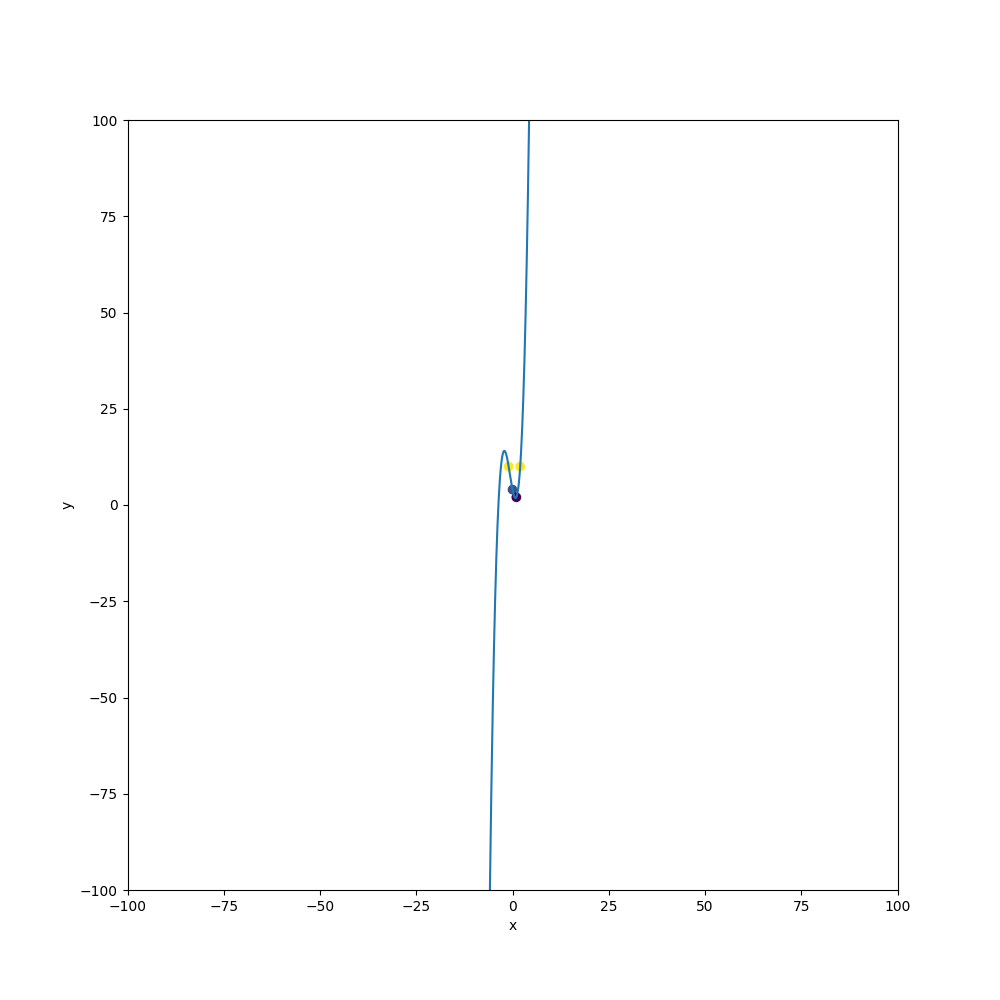

In [3]:
answers = FP.find_equation(degree, dimensions, input_vals, output)
FP.find2dEquation(input_vals, output, answers, degree, dimensions)

<h2><b>The 2D and 3D graphs are interactive!</b></h2> (for plt, not desmos)

Double checking our work in desmos over $D, R : [-100, 100]$ yields the following:

<img src='DesmosCubic.png' style="height: 75%; width: 75%"> </img>

<h1> 3D Example </h1>

Now for a 3D Example.
Suppose the equation $$ z = x^2 - y^2 + 1 $$ Pssing through $$(0, 0, -1)\\ (1, 1, 1)\\ (-1, -1, 1)\\ (1, 2, 4)\\ (2, 1, 4)\\ (0, 1, 0)\\ (0, 2, 3)\\ (3, 3, 17)\\ (3, 2, 12)$$

In [4]:
degree = 2
dimensions = 3
input_vals = np.array([[0, 0], [1, 1], [-1, -1], [1, 2], [2, 1], [0, 1], [0, 2], [3, 3], [3, 2]])
output = np.array([[-1], [1],[1],[4],[4],[0],[3],[17],[12]])

FP.find_equation_Human(degree, dimensions, input_vals, output)

'+ 1.0 a⁰b² + 1.0 a²b⁰ - 1.0 a⁰b⁰ '

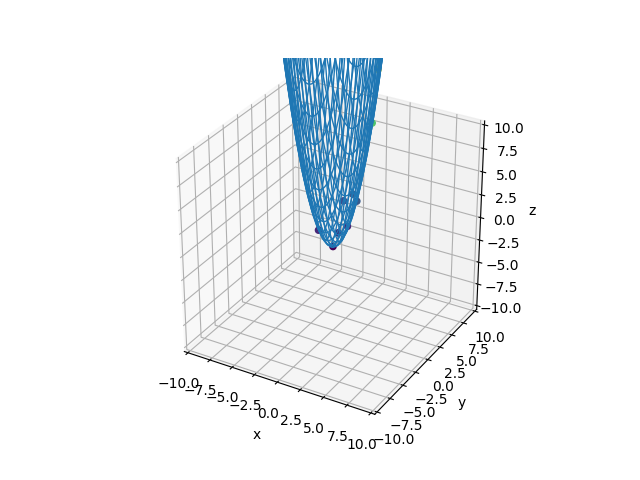

In [5]:
answers = FP.find_equation(degree, dimensions, input_vals, output)
FP.find3dEquation(input_vals, output, degree, dimensions, answers)

You can use geogebra's 3D Grapher to verify your results. 


In [6]:
# answers = FP.find_equation(degree, dimensions, input_vals, output)
# FP.find3dEquation(input_vals, output, degree, dimensions, answers)

<h1>Diving into the Math</h1>

<b><h3> How many points? </h3>

The math for this is very interesting, in my opinion. There is a relationship between how the amount of points needed scale, defined by: $$p_{points} = (d_{degree} + 1)^{d_{dimensions} -1}$$

$p_{points}$ not only represents the amount of points you need, but also the amount of coefficients in that equation's standard form. Standard forms for 2D Linear and 2D Cubic equations are shown below:$$y = ax^1 + bx^0$$ $$y = ax^3 + bx^2 + cx^1 + dx^0$$ In 3D, the amount of coefficients scale even more rapidly: $$z = ax^1y^1 + bx^0y^1 + cx^1y^0 + dx^0y^0$$ $$z = ax^2y^2 + bx^1y^2 + cx^0y^2 + dx^2y^1 + ex^1y^1 + fx^0y^1 + gx^2y^0 + hx^1y^0 + ix^0y^0$$
*note the cyclic nature: $x^{2, 1, 0, 2, 1, 0, 2, 1, 0}$ and $y^{2, 2, 2, 1, 1, 1, 0, 0, 0}$

I won't go into 4D equations, as those scale as cubics: $(d_{degree} + 1)^3$.

$p_{points}$ is rather important in my code. It is defined as the variable <code>general</code>, and is used for traversing most of my <code>for loops</code> and setting the size of my matrices.





<b><h3> Matrix Multiplication </h3>

The clever part of my code lies in figuring out what to raise the input points to. I will show this line-by-line. I will also include a mathematical formula at the end that reflects my code.

You can display the coeffecients you want to find using systems of equations and matrices. For a quadratic $ax^2 + bx + c = y$, you need three points to get everything set up:
$$
\left\{ 
\begin{array}{c}
ax^2_1+bx_1+c=y_1 \\ \\
ax^2_2+bx_2+c=y_2 \\ \\
ax^2_3+bx_3+c=y_3
\end{array}
\right. 
$$

Next, all you have to do is convert this into a matrix: 
\begin{bmatrix}
x^2_1 & x_1 & 1 \\
x^2_2 & x_2 & 1 \\
x^2_3 & x_3 & 1
\end{bmatrix}

From here, the math is simple:

$$
\begin{bmatrix}
x^2_1 & x_1 & 1 \\
x^2_2 & x_2 & 1 \\
x^2_3 & x_3 & 1
\end{bmatrix}
\begin{bmatrix}
a \\
b \\
c
\end{bmatrix} = 
\begin{bmatrix}
y_1 \\
y_2 \\
y_3
\end{bmatrix}
$$
For purposes later on, assume the above equation is synonymous with $AB=C$.
$$
\begin{bmatrix}
a \\
b \\
c
\end{bmatrix} = 
\begin{bmatrix}
x^2_1 & x_1 & 1 \\
x^2_2 & x_2 & 1 \\
x^2_3 & x_3 & 1
\end{bmatrix}^{-1}
\begin{bmatrix}
y_1 \\
y_2 \\
y_3
\end{bmatrix}
$$

Of course, all this is what allows for scaling to any N-Dimensions. Converting this to code is incredibly simple, given you want to put in the precalculated values into the matrices. In order to automate it so that all you need are points, you must figure out the exponents to raise variables to. 



<b><h3>Code Tracing & Explaination</h3>

The main code: 
```py
main = np.ones([general, general])
for i in range(general): #equation number
  for j in range(general): #equation element
    counter = degree**np.arange(dimSmall)
    middle = (j//counter)%degree
    main[i, j] = np.prod(input_vals[i, :]**(degree-middle-1))
```
In this code, `main` is our generalized $A$. `i` represents the current row, or equation. `j` represents the current column, or the current element of the current equation. 
We will trace our code with the equation $x^1y^1 + x^0y^1 + x^1y^0 + x^0y^0$.
`counter` raises $2$ (remember, `degree = degree + 1`, or $2 = (1) + 1$) to the array [0, 1], or mathematically,
$$2^{\begin{bmatrix} 0 & 1 \end{bmatrix}}$$
This outputs `counter` = $\begin{bmatrix} 1 & 2 \end{bmatrix}$. 

Next, to get `middle` we take $j_{currentElement}$ and floor divide it, and then $\bmod 2$ it. Floor division rounds your answer to the previous `int`, i.e `3.5//1 = 3,  4//2 = 2, 7//2 = 3`. 
I'll represent `j` as an array to make this a bit easier.
$$\left(\frac{0}{\begin{bmatrix} 1 & 2 \end{bmatrix}}\right)\bmod 2,   \left(\frac{1}{\begin{bmatrix} 1 & 2 \end{bmatrix}}\right)\bmod 2,   \left(\frac{2}{\begin{bmatrix} 1 & 2 \end{bmatrix}}\right)\bmod 2,   \left(\frac{3}{\begin{bmatrix} 1 & 2 \end{bmatrix}}\right)\bmod 2$$
$\frac{0}{\begin{bmatrix} 1 & 2 \end{bmatrix}}$ yields a new array containing $\begin{bmatrix} 0 & 0 \end{bmatrix}$

Thus, `middle` = $\begin{bmatrix} 0 & 0 \end{bmatrix}$

Finally, we take the product of the input values raised to our array matrices. `np.prod(input_vals[i, :]**(degree-middle-1))` Assume that `input_vals[i, :] = [1, 2]`
$$ \begin{bmatrix} 1 & 2 \end{bmatrix}^{2-\begin{bmatrix} 0 & 0 \end{bmatrix}-1} $$
$$ \begin{bmatrix} 1 & 2 \end{bmatrix}^{\begin{bmatrix} 1 & 1 \end{bmatrix}} $$
$$ \begin{bmatrix} 1^1 & 2^1 \end{bmatrix} $$

Yielding a new array $\begin{bmatrix} 1 & 2 \end{bmatrix}$. Taking the `np.prod` of this array yields all of the elements multiplied by each other. So, after all that work, the $x^1y^1$ evaluates to $2$. 

Working through the second example quickly, we get 
$$\left(\frac{1}{\begin{bmatrix} 1 & 2 \end{bmatrix}}\right)\bmod 2 = \begin{bmatrix} 1 & 0 \end{bmatrix}$$
$$ \begin{bmatrix} 1 & 2 \end{bmatrix}^{2-\begin{bmatrix} 1 & 0 \end{bmatrix}-1} = \begin{bmatrix} 1 & 2 \end{bmatrix}^{\begin{bmatrix} 1 & 0 \end{bmatrix}} $$

$$x^0y^1 = 1^1*2^0 = 1*1 = 1$$

<h1>Degree Mislabelling<h1>

When inputting points from a linear equation into, say, a cubic, the program still works, giving you your desired equation. However, putting in points from a quadratic into a linear will also give you an equation, just not a quadratic. 

In [7]:
degree = 3
dimensions = 2
input_vals = np.array([[0],[1],[2],[3]])
output = np.array([[0],[1],[2],[3]])

FP.find_equation_Human(degree, dimensions, input_vals, output)

'+ 1.0 a¹ '

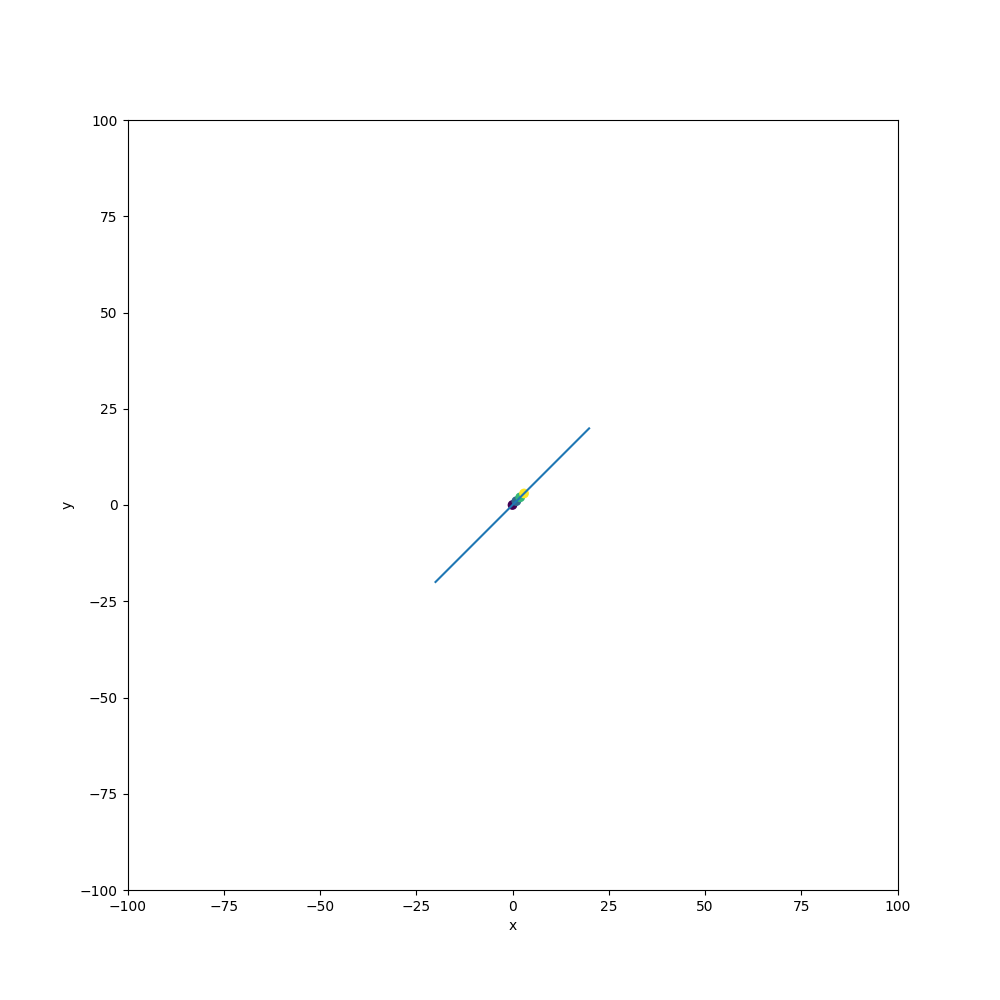

In [8]:
answers = FP.find_equation(degree, dimensions, input_vals, output)
FP.find2dEquation(input_vals, output, answers, degree, dimensions)

$$z = x + y$$
This is also true for 3D:

In [9]:
degree = 2
dimensions = 3
input_vals = np.array([[0, 0], [1, 0], [0, 1], [1, 1], [1, 2], [2, 1], [2, 2], [2, 3], [3, 2]])
output = np.array([[0], [1],[1],[2],[3],[3],[4],[5],[5]])

FP.find_equation_Human(degree, dimensions, input_vals, output)

'+ 1.0 a⁰b¹ + 1.0 a¹b⁰ '

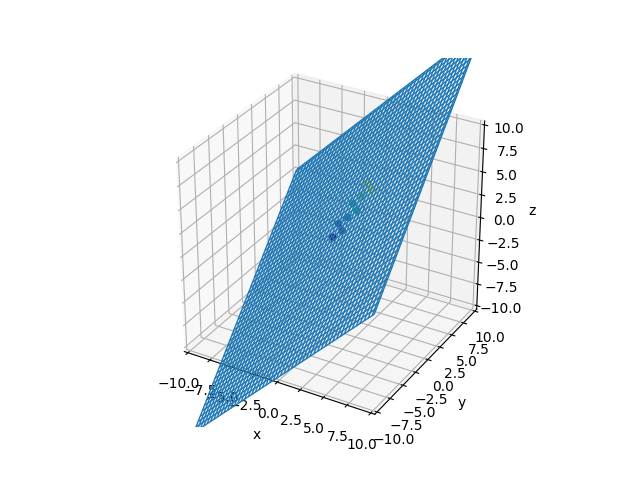

In [10]:
answers = FP.find_equation(degree, dimensions, input_vals, output)
FP.find3dEquation(input_vals, output, degree, dimensions, answers)

<h1>Experiment</h1>

With your new knowledge, feel free to mess around.

In [11]:

# degree = 
# dimensions = 
# input_vals = 
# output = 

# FP.find_equation_Human(degree, dimensions, input_vals, output)

In [12]:
# answers = FP.find_equation(degree, dimensions, input_vals, output)
# FP.find3dEquation(input_vals, output, degree, dimensions, answers)

<h1> Applications </h1>

The main application for this is in Machine Learning. By having a machine record the value of its neurons, and the associated cost enough times, it will be possible to find the exact cost function of the machine. Taking derivatives of the function would yield global minima. You could then surgically move the machine's inputs to the highest possible efficiency.  Of course, one limiting factor is how much input you have: if your neural network is comprised of $100$ Dense layers with $100$ neurons each, you have $10,000$ neurons total. Plugging this into our equation from before, your cost function would be $10,000$ Dimensional. Assuming the degree of your Cost function is $100$, or $200$, you would need $101^{10000}$ input and output pairs to fully predict the cost function of your algorithm. This would require terabytes, if not petabytes, of data. Though not applicable yet, a future civilization with much more computing power could run this on giant neural networks, or today's civilization could use this for smaller projects.

When using this with an AI, it is possible to only input `input_vals` and `output`, by setting the rest of the vars in the `def`:
```py
dimensionality = int(len(input_vals[0]) + len(output[0]))
dimSmall = int(dimensionality - 1)
first_dim = int(len(output)**(1/dimSmall))
general = int((first_dim)**(dimensionality-1))
```
You could also just pass in `values` and edit the code to work with one array, or a `Pandas` CSV without too much difficulty. 

Though untested by me, there may be a different way to find the $C(x)$ of a neural network. If we are able to derive a general Point-Derivative form for any-D equations, it may be possible to calculate the exact cost function of an AI before the universe ends. 

Possible Point-Derivative Form:  $$f(x) = f'(x)(x - x_1) + y_1$$ 
This is PD form for a linear 2d equation. I have yet to test it for quadratics. If this is not a dead end, I will follow up on my GitHub.

<h1> Pure Math <h1>

Assume that all the array operations are the same as in `numpy`. A number `n` raised to an `array` is undefined in linear algebra, but I feel `numpy`'s definition makes sense. 

Variables: 


$d_{degree} = degree + 1$

$d_{dimension} = dimensions$

$p = degree^{d_{dimension}-1}$

Contains your variables (as letters):

$V = \begin{bmatrix} a_1 & ... & a_p\end{bmatrix}$

Variables Formula:
$$E = \sum_{i=0}^{p-1}\left(\prod_{j=0}^{p-1}{V_j^{d_{degree}-[\lfloor{\left(\frac{j}{d_{degree}^j}\right)\rfloor}\bmod{d_{degree}}]-1}}\right)$$



Points Formula:

$I = \begin{bmatrix} x_1 & y_1 & ... \\ ...&...&... \\ x_p & y_p & ... \end{bmatrix}$

$C = \begin{bmatrix} z_1 \\ ... \\ z_p \end{bmatrix}$

In below equation, $Z$ is the equation number from $B$. 
$$E = \sum_{i=0}^{p-1}\left(\prod_{j=0}^{p-1}{I_{Z, j}^{d_{degree}-[\lfloor{\left(\frac{j}{d_{degree}^j}\right)\rfloor}\bmod{d_{degree}}]-1}}\right)$$

Replace $+$ and $-$ with commas.
$$ B = \begin{bmatrix} E_0 \\ ... \\ E_p \end{bmatrix}$$

$$A = B^{-1}C

